# **I have impoted some libraryies for data analysis**


In [2]:
# imports important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
#import scikitplot as skplt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import warnings
warnings.filterwarnings('ignore')

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **We have used pandas library for read dataset**

In [5]:
#Read the data file and store it in a dataframe
df = pd.read_csv("/content/drive/MyDrive/NSU/HAR/AllData.csv")
df.head()

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person,Class
0,1.560000e+12,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,4,Eating
1,1.560000e+12,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,4,Eating
2,1.560000e+12,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,4,Eating
3,1.560000e+12,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,4,Eating
4,1.560000e+12,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,4,Eating


In [6]:
#Print the last n (default 5) records
df.tail()

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person,Class
72089,1.560000e+12,-0.945923,-0.182861,0.105103,-70.457317,-11.829268,11.463415,5,Walking
72090,1.560000e+12,-0.898315,-0.176880,0.078857,-71.280488,-11.890244,10.884146,5,Walking
72091,1.560000e+12,-0.863159,-0.199097,0.086548,-71.676829,-19.390244,-1.006098,5,Walking
72092,1.560000e+12,-0.904907,-0.189941,0.088989,-58.963415,-10.152439,25.731707,5,Walking
72093,1.560000e+12,-0.941895,-0.152100,0.086914,-58.658537,-9.207317,23.048780,5,Walking


In [7]:
# The shape of our dataset.
df.shape

(72094, 9)

In [8]:
# Data type of each column.
df.dtypes

Time      float64
Acc_x     float64
Acc_y     float64
Acc_z     float64
Gry_x     float64
Gry_y     float64
Gry_Z     float64
Person      int64
Class      object
dtype: object

In [9]:
#find missing values per column
df.isnull().sum()

Time      0
Acc_x     0
Acc_y     0
Acc_z     0
Gry_x     0
Gry_y     0
Gry_Z     0
Person    0
Class     0
dtype: int64

In [10]:
df.describe()

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person
count,7.209400e+04,72094.000000,72094.000000,72094.000000,72094.000000,72094.000000,72094.000000,72094.000000
mean,1.560000e+12,-0.447154,0.402126,-0.189126,-2.895353,-0.584548,-0.605051,3.006131
std,0.000000e+00,0.572069,0.465418,0.210580,42.258991,41.297331,27.830226,2.704813
min,1.560000e+12,-1.283447,-1.066040,-1.184326,-588.658537,-664.634146,-340.792683,-1.000000
25%,1.560000e+12,-0.863892,-0.031494,-0.349243,-11.615854,-10.091463,-8.864329,-1.000000
50%,1.560000e+12,-0.743408,0.556519,-0.214478,-5.274390,0.000000,1.006098,4.000000
75%,1.560000e+12,-0.036987,0.782440,-0.057495,4.359756,4.756098,8.445122,5.000000
max,1.560000e+12,1.146362,1.199951,0.564331,414.878049,625.335366,504.054878,6.000000


In [11]:
df["Class"].unique()

array(['Eating', 'Speak and Walk', 'Speaking', 'Staying', 'Walking'],
      dtype=object)

In [12]:
# Number of different types of classes
df['Class'].value_counts()

Speak and Walk    18673
Staying           16453
Walking           14541
Speaking          12867
Eating             9560
Name: Class, dtype: int64

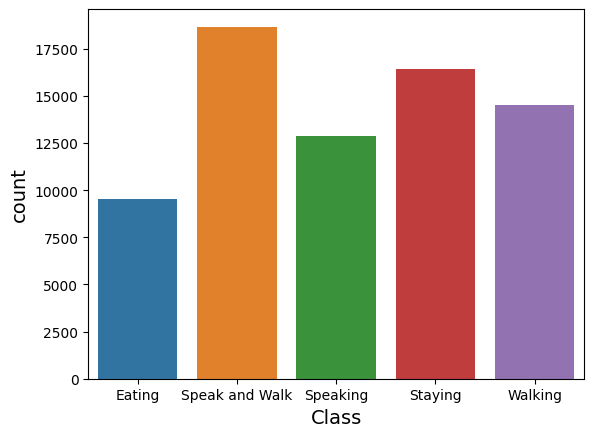

In [13]:
sns.countplot(x="Class", data=df);

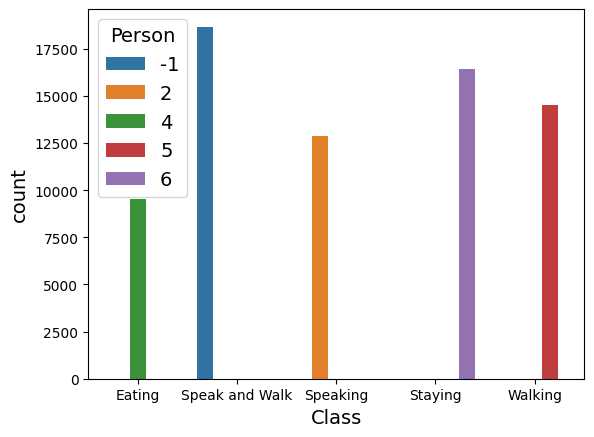

In [14]:
# Depends on gender, we have shown the classes in seaborn.
sns.countplot(x="Class", data=df, hue="Person");


In [15]:
df.columns


Index(['Time', 'Acc_x', 'Acc_y', 'Acc_z', 'Gry_x', 'Gry_y', 'Gry_Z', 'Person',
       'Class'],
      dtype='object')

In [16]:
# Separate Independent (X) and Dependent(y) features
y = df['Class']
X = df.drop(columns ='Class')

In [17]:
# Print first five instances.
X.head()

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person
0,1.560000e+12,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,4
1,1.560000e+12,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,4
2,1.560000e+12,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,4
3,1.560000e+12,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,4
4,1.560000e+12,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,4


In [18]:
y.value_counts()

Speak and Walk    18673
Staying           16453
Walking           14541
Speaking          12867
Eating             9560
Name: Class, dtype: int64

In [19]:
pip install -U numpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

# ZeroR classifier

In [21]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dummy_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

                precision    recall  f1-score   support

        Eating       0.00      0.00      0.00      1912
Speak and Walk       0.26      1.00      0.41      3735
      Speaking       0.00      0.00      0.00      2573
       Staying       0.00      0.00      0.00      3291
       Walking       0.00      0.00      0.00      2908

      accuracy                           0.26     14419
     macro avg       0.05      0.20      0.08     14419
  weighted avg       0.07      0.26      0.11     14419

Train Accuracy:  0.25900303424360643
Test Accuracy:  0.2590332200568694


# K-Nearest Neighbor

In [23]:
df.head()

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person,Class
0,1.560000e+12,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,4,Eating
1,1.560000e+12,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,4,Eating
2,1.560000e+12,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,4,Eating
3,1.560000e+12,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,4,Eating
4,1.560000e+12,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,4,Eating


# Data Pre-Processing

In [26]:
# We will use the label encoder to encode gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] =le.fit_transform(df['Class']) 

In [27]:
print(df.shape)
df.head(10)

(72094, 9)


,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person,Class
0,1.560000e+12,0.499756,0.798584,-0.313110,-16.768293,-10.091463,11.189024,4,0
1,1.560000e+12,0.497314,0.826172,-0.312622,-6.981707,-11.310976,10.731707,4,0
2,1.560000e+12,0.495605,0.825562,-0.313477,-5.823171,-11.402439,3.993902,4,0
3,1.560000e+12,0.493408,0.823242,-0.314697,-5.091463,-11.067073,6.890244,4,0
4,1.560000e+12,0.495605,0.819336,-0.315552,-4.115854,-11.189024,16.890244,4,0
5,1.560000e+12,0.531616,0.817871,-0.314941,-10.914634,-11.524390,17.012195,4,0
6,1.560000e+12,0.540649,0.813599,-0.315430,-9.695122,-4.146341,15.792683,4,0
7,1.560000e+12,0.546509,0.780640,-0.316895,-8.810976,-4.237805,7.042683,4,0
8,1.560000e+12,0.523926,0.777588,-0.318848,0.121951,-10.396341,7.256098,4,0
9,1.560000e+12,0.527100,0.775391,-0.320557,0.487805,-8.292683,15.853659,4,0


In [28]:
#Let's now split the dataset in the same way we have done for ZeroR classifier
y = df['Class']
X = df.drop(columns = 'Class')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

In [29]:
# We need to scale correctly (We will use MinMax Scaler to do this)
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Acc_x', 'Acc_y', 'Acc_z', 'Gry_x', 'Gry_y', 'Gry_Z']
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [30]:
X_train.head()

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person
42142,1.560000e+12,0.801431,0.794822,0.518605,0.587100,0.508568,0.407167,6
49992,1.560000e+12,0.241688,0.784822,0.660418,0.575131,0.507977,0.407059,6
20289,1.560000e+12,0.101904,0.778661,0.492757,0.515160,0.523599,0.319007,-1
71548,1.560000e+12,0.143764,0.369602,0.700824,0.873253,0.567725,0.318393,5
66860,1.560000e+12,0.156710,0.720339,0.371680,0.611071,0.503037,0.387211,5


In [31]:
X_test.head()

,Time,Acc_x,Acc_y,Acc_z,Gry_x,Gry_y,Gry_Z,Person
22503,1.560000e+12,0.227634,0.731474,0.508664,0.606271,0.503935,0.441305,-1
48114,1.560000e+12,0.830345,0.702827,0.395469,0.589045,0.517714,0.399949,6
23060,1.560000e+12,0.140590,0.460840,0.663329,0.562401,0.513838,0.405290,-1
51867,1.560000e+12,0.122658,0.474947,0.635492,0.577166,0.507268,0.381906,6
14027,1.560000e+12,0.635452,0.869899,0.527837,0.607060,0.482026,0.503266,-1


In [32]:
df.columns

Index(['Time', 'Acc_x', 'Acc_y', 'Acc_z', 'Gry_x', 'Gry_y', 'Gry_Z', 'Person',
       'Class'],
      dtype='object')